In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB


# For reproducibility
np.random.seed(1000)

# NB with Bernoulli distribution: 

In [3]:
nb_samples = 300

def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

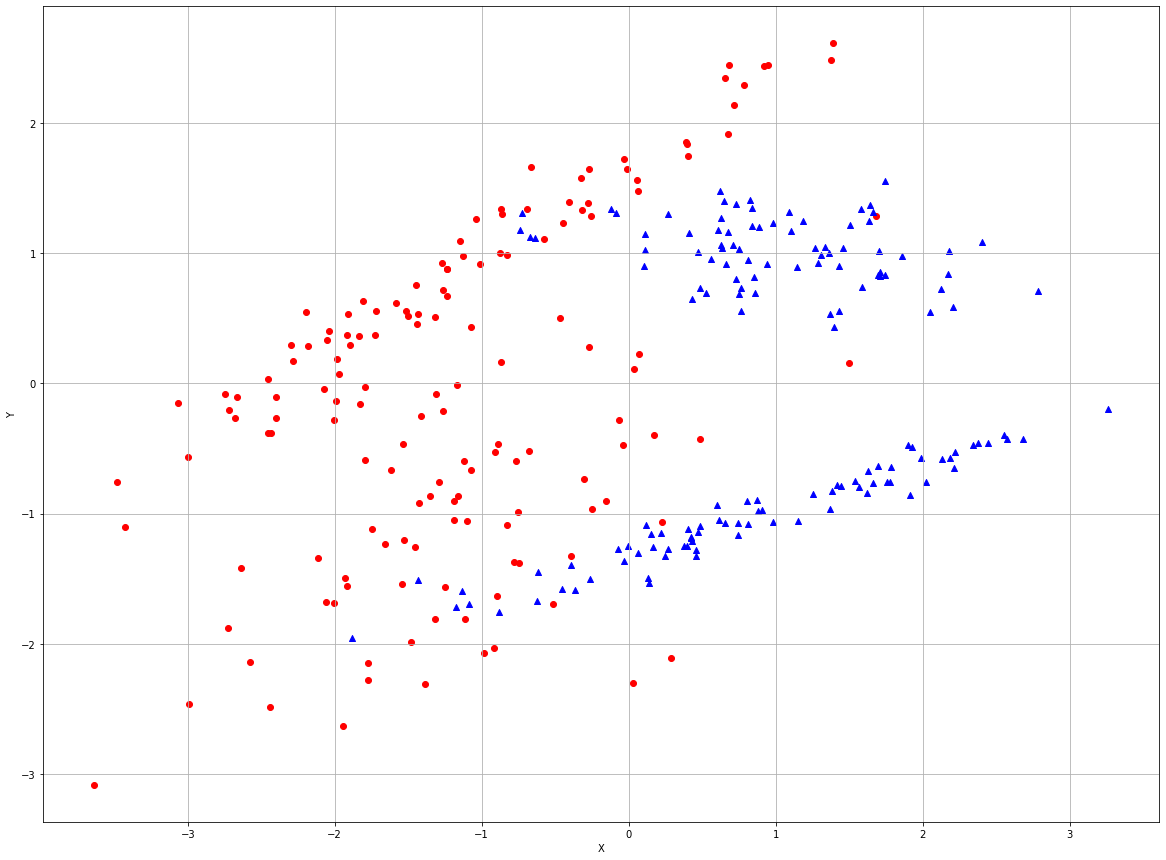

In [4]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

Bernoulli naive Bayes expects binary feature vectors; however, the class BernoulliNB has a binarize parameter, which allows us to specify a threshold that will be used internally to transform the features:

In [5]:
# Create and train Bernoulli Naive Bayes classifier
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)

print('Bernoulli Naive Bayes score: %.3f' % bnb.score(X_test, Y_test))

Bernoulli Naive Bayes score: 0.840


In [6]:
# Compute CV score
bnb_scores = cross_val_score(bnb, X, Y, scoring='accuracy', cv=10)
print('Bernoulli Naive Bayes CV average score: %.3f' % bnb_scores.mean())

# Predict some values
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Yp = bnb.predict(data)
print(Yp)

Bernoulli Naive Bayes CV average score: 0.853
[0 0 1 1]


# Multinomial naive Bayes

Binomial： \\(p(k|n,p)=C_n^kp^k(1-p)^{n-k}\\)\
\
Multinomial: \\(p(x_1\cap x_2\cap ...\cap x_k) = \frac{n!}{\Pi_i x_i!}\Pi_i p_i^{x_i}\\), in a total of n times of experiments, the prob. of seeing i (in this case a particular word) for \\(x_i\\) times (the frequency of the word).\
\
If we denotes the classification as 0,1, their probabilities as \\(p(C=0)\\) and \\(p(C=1)\\) and apply Bayes Theorem:\
\
\\(p(C|x_1\cap x_2\cap ...\cap x_k) = \alpha * p(x_1\cap x_2\cap ...\cap x_k|C) * p(C)\\)\
\
Adding the Naive condition:\
\
\\(p(C|x_1\cap x_2\cap ...\cap x_k) = \alpha * p(x_1|C) * p(x_2|C) ... * p(x_k|C)* p(C)\\)\
\
Thus by counting the freq. of each word under different class, the probability of classes under certain word frequency can be calculated. The class can then be determined by comparing the respective products on the R.H.S.. 

In [7]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB

In [8]:
# Prepare a dummy dataset
data = [
    {'house': 100, 'street': 50, 'shop': 25, 'car': 100, 'tree': 20},
    {'house': 5, 'street': 5, 'shop': 0, 'car': 10, 'tree': 500, 'river': 1}
]

# Create and train a dictionary vectorizer
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(data)
Y = np.array([1, 0])

In [9]:
# Create and train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X, Y)

MultinomialNB()

In [10]:
# Create dummy test data
test_data = data = [
    {'house': 80, 'street': 20, 'shop': 15, 'car': 70, 'tree': 10, 'river': 1},
    {'house': 10, 'street': 5, 'shop': 1, 'car': 8, 'tree': 300, 'river': 0}
]

Yp = mnb.predict(dv.fit_transform(test_data))
print(Yp)

[1 0]


# Gaussian naive Bayes

The probability of x, given a Gaussian distribution with \\(\mu\\) and \\(\sigma\\) is: \\(p(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x-\mu)^2}{2\sigma^2}}\\)\
\
The ***likelihood*** of distribution, given data x, is also expressed as (mean and variance as unknown, nonetheless):\
\
\\(L(\mu,\sigma|x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x-\mu)^2}{2\sigma^2}}\\).\
\
Maximizing likelihood allows us to determine the parameters of the distribution, namely \\(\mu\\) and \\(\sigma\\). And in the case where we have multiple observations, we would want to maximize:\
\
\\(L(\mu,\sigma|x_1\cap x_2 \cap ... \cap x_n)\\).\
\
Assuming independence, \\(L(\mu,\sigma|x_1\cap x_2 \cap ... \cap x_n) = L(\mu,\sigma|x_1)* ... L(\mu,\sigma|x_n)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x_1-\mu)^2}{2\sigma^2}}*...*\frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x_n-\mu)^2}{2\sigma^2}} \\).\
\
What we want to do is to take derivatives with respect to \\(\mu\\) and \\(\sigma\\) so as to Maximize L. However, maximizing \\( ln(L) \\) would achieve the same goal while simplifies the derivation. Taking the natural log of L first,\
\
\\(ln(L(\mu,\sigma|x_1\cap x_2 \cap ... \cap x_n)) = -\frac{n}{2}ln(2\pi)- n ln\sigma - \Sigma_i \frac{(x_i-\mu)^2}{2\sigma^2}\\).\
\
Now, taking the derivatives, and set them to 0, we get:\
\
\\(\mu=\sigma_i x_i/n\\) and\
\
\\(\sigma = \sqrt{\frac{\Sigma_i (x_i - \mu)^2}{n}}\\).\
\
Maximizing likelihood allows us to determine the parameters of Gaussian distribution in the way that is intuitively correct.\
\
Maximizing the conditional likelihood involves nothing more than carrying out the above process **for each class**. Computing the mean and variance of samples in each class allows us to determine the set of mean and variance for the likelihood conditional to that class.  

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

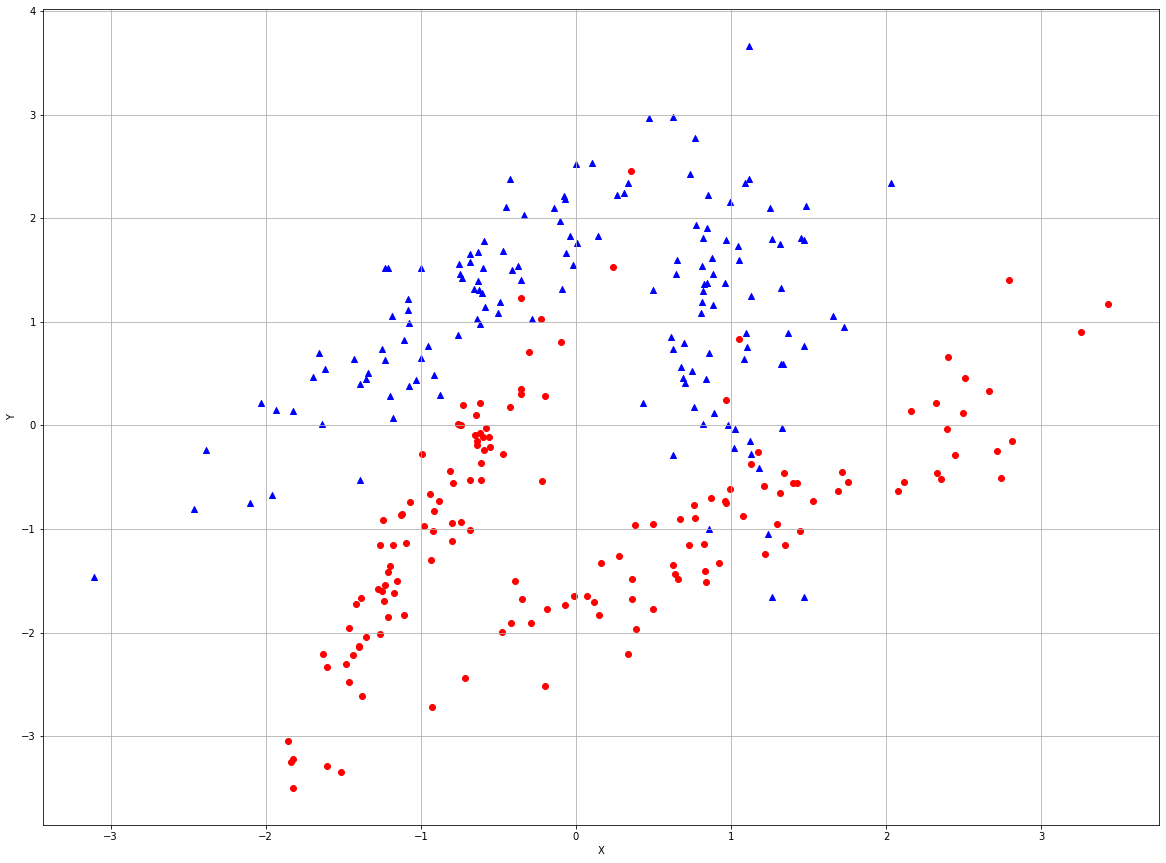

In [12]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [13]:
# Create and train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# Create and train a Logistic regressor (for comparison)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [14]:
# Compute ROC Curve
Y_gnb_score = gnb.predict_proba(X_test)
Y_lr_score = lr.decision_function(X_test)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

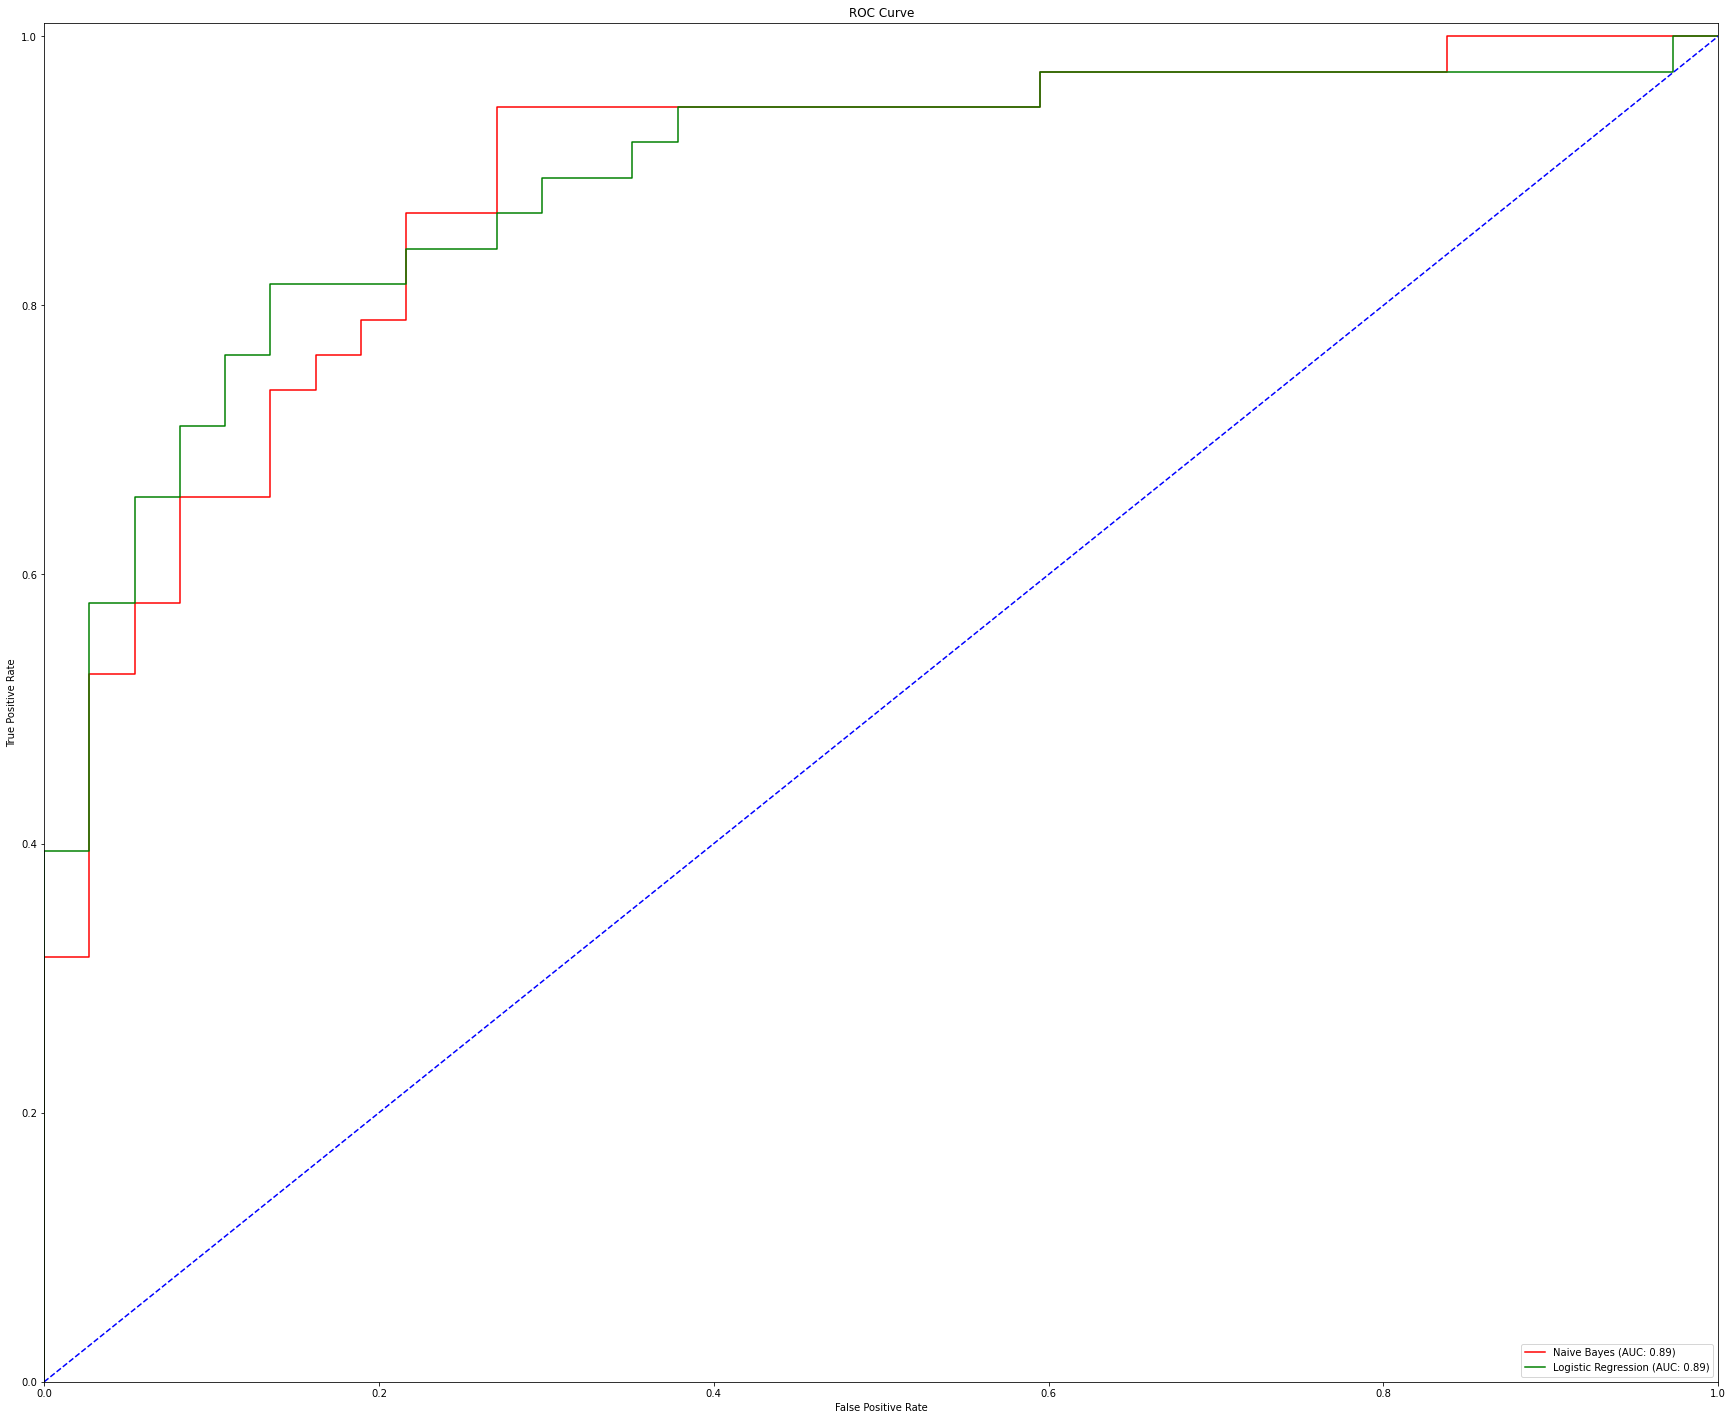

In [15]:
# Plot ROC Curve
plt.figure(figsize=(30, 25))

plt.plot(fpr_gnb, tpr_gnb, color='red', label='Naive Bayes (AUC: %.2f)' % auc(fpr_gnb, tpr_gnb))
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC: %.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()


# On MNIST dataset:

Each sample (belonging to 10 classes) is an 8 x 8 image encoded as an unsigned integer (0-255); therefore, even if each feature doesn't represent an actual count, it can be considered as a sort of magnitude or frequency:

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [17]:
digits = load_digits()
gnb = GaussianNB()
mnb = MultinomialNB()

Some visulization:

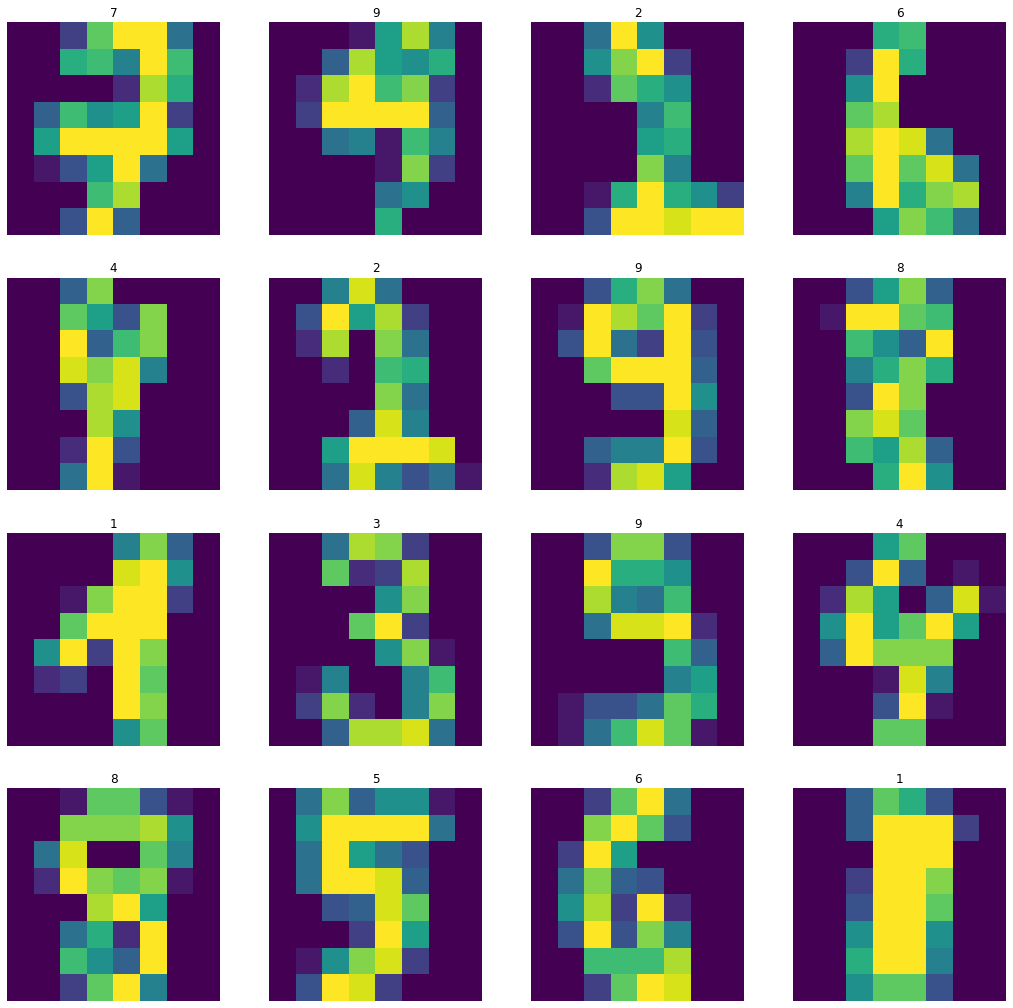

In [46]:
m = 4 
n = 4
fig=plt.figure(figsize=(18, 18))
rand = np.random.randint(digits.data.shape[0], size=(m*n))
idx = 0
for i in range( m * n ):
    fig.add_subplot(m,n,i+1)
    plt.imshow(digits.data[rand[i]].reshape(8,8))
    plt.title(digits.target[rand[i]])
    plt.axis('off')
plt.show()

In [18]:
gnb_scores = cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10)
mnb_scores = cross_val_score(mnb, digits.data, digits.target, scoring='accuracy', cv=10)
print('Gaussian NB regression CV average score: %.3f' % gnb_scores.mean())
print('Multinomial NB regression CV average score: %.3f' % mnb_scores.mean())

Gaussian NB regression CV average score: 0.811
Multinomial NB regression CV average score: 0.880


Multinomial naive Bayes performs better than the Gaussian variant and the result is not really surprising. In fact, each sample can be thought of as a feature vector derived from a dictionary of 64 symbols (8*8 pixels). The value can be the count of each occurrence, so a multinomial distribution can better fit the data, while a Gaussian is slightly more limited by its mean and variance.

Get back to more reviewing on how multinomial works in the MNIST data. We have,\
\
\\(p(x_1\cap x_2\cap ...\cap x_k) = \frac{n!}{\Pi_i x_i!}\Pi_i p_i^{x_i}\\)\
\
\\(p(C|x_1\cap x_2\cap ...\cap x_k) = \alpha * p(x_1|C) * p(x_2|C) ... * p(x_k|C)* p(C)\\)\
\
The C here just corresponds to the 10 classes (digits 0-9) in MNIST. But what are \\(x_1\\), ... ,\\(x_k\\)?\
\
Recall that the first equation can be expressed in full form as:\
\
\\(p((X_1 = x_1)\cap (X_2 = x_2)\cap ...\cap (X_k = x_k)) = \frac{n!}{\Pi_i x_i!}\Pi_i p_i^{x_i}\\) and \\(x_i\\) denotes the count of observations of i (without considering the order). Also, \\(x_1\cap x_2\cap ...\cap x_k\\) in the second equation describes a picture. So, \\(x_i\\) denotes the counts of seeing value i (0-255) in the 64 pixels. (Note that the difference in order is not considered in multinomial model, therefore, in the eyes of multinomial model, a picture with a digit would be the same as any picture with the same ***distribution of pixels***). \
\
So the calculation of \\(p(x_1|C)\\) boils down to conditional \\(p_i\\), which come from counting the times of occurance of i in the pictures from the same class. Thus, we can see it's less restricted than Gaussian model. 